In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import re
from ipaddress import ip_address, IPv4Address, IPv6Address
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import precision_score,recall_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from kydavra import PointBiserialCorrSelector
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression

In [2]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

In [3]:
## Create Dataset ##
url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')
url_df.drop(columns=url_df.columns[1:-1], inplace=True)
feature_fnc.parseurl(url_df)
cleaned_df=feature_fnc.feature_generator(url_df)
cleaned_df.set_index('url',inplace=True)

In [13]:
cleaned_df

status  \
url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                          legitimate   
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                    phishing   
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_                                                                                                                                                                                                                                                                                                                                                                   phishing   
http://rgipt.ac.in                                                                                                                                                                                                                                                                                                                                                                                                                                                                             legitimate   
http://www.iracing.com/tracks/gateway-motorsports-park/                                                                                                                                                                                                                                                                                                                                                                                                                                        legitimate   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
http://www.fontspace.com/category/blackletter                                                                                                                                                                                                                                                                                                                                                                                                                                                  legitimate   
http://www.budgetbots.com/server.php/Server%20

In [4]:
cleaned_df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [14]:
cleaned_df

status  \
url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                          legitimate   
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                    phishing   
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_                                                                                                                                                                                                                                                                                                                                                                   phishing   
http://rgipt.ac.in                                                                                                                                                                                                                                                                                                                                                                                                                                                                             legitimate   
http://www.iracing.com/tracks/gateway-motorsports-park/                                                                                                                                                                                                                                                                                                                                                                                                                                        legitimate   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
http://www.fontspace.com/category/blackletter                                                                                                                                                                                                                                                                                                                                                                                                                                                  legitimate   
http://www.budgetbots.com/server.php/Server%20

In [4]:
cleaned_df=cleaned_df.replace({'legitimate': 0, 'phishing': 1})

In [5]:
cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)

In [6]:
selector = VarianceThreshold()
selector.fit_transform(cleaned_df)


array([[  0,   0,  37, ...,   0,   0,   0],
       [  1,   0,  77, ...,   0,   0,   0],
       [  1,   1, 126, ...,   0,   0,   0],
       ...,
       [  0,   1, 105, ...,   0,   0,   0],
       [  0,   0,  38, ...,   0,   0,   0],
       [  1,   0, 477, ...,   0,   0,   0]], dtype=int64)

In [18]:
removed=cleaned_df.loc[:, ~selector.get_support()]

In [19]:
removed.columns

Index(['hostname_slash_count', 'hostname_questionmark_count',
       'hostname_equal_count', 'hostname_at_count', 'hostname_and_count',
       'hostname_exclamation_count', 'hostname_space_count',
       'hostname_space_encoded_count', 'hostname_comma_count',
       'hostname_tilde_count', 'hostname_plus_count',
       'hostname_asterisk_count', 'hostname_hashtag_count',
       'hostname_dollar_count', 'hostname_percent_count',
       'query_hashtag_count', 'file_slash_count', 'file_questionmark_count',
       'file_space_count', 'file_hashtag_count', 'file_dollar_count'],
      dtype='object')

In [7]:
cleaned_df=cleaned_df.loc[:, selector.get_support()]

In [8]:
cleaned_df

phishing  \
url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0   
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                         1   
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_                                                                                                                                                                                                                                                                                                                                                                        1   
http://rgipt.ac.in                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    0   
http://www.iracing.com/tracks/gateway-motorsports-park/                                                                                                                                                                                                                                                                                                                                                                                                                                               0   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ...   
http://www.fontspace.com/category/blackletter                                                                                                                                                                                                                                                                                                                                                                                                                                                         0   
http://www.budgetbots.com/server.php/Server%20update/index.p

In [50]:
a = np.empty((0, 0))

In [52]:
type(a)

numpy.ndarray

In [55]:
def pointbiserialrcorr(features,label):
    corr_value=np.empty((0, 0))
    p_value=corr_value=np.empty((0, 0))
    for i in range(len(features.axes[1])):
        print(features.iloc[:,i])
        #corr, p=stats.pointbiserialr(features.iloc[:,i],label)
        corr, p=stats.pointbiserialr(features.iloc[:,i],label)
        corr=abs(corr)
        corr=abs(corr)
        corr_value=np.append(corr_value,corr)
        p_value=np.append(p_value,p)
        # corr_value.append(corr)
        # p_value.append(p)
        # print(corr_value)
        # print(p_value)
    return corr_value,p_value

In [257]:
def pointbiserialrcorr(features,label):
    corr_value=np.empty((0, 0))
    p_value=corr_value=np.empty((0, 0))
    features=features.T
    for i in range(len(features)):
        #corr, p=stats.pointbiserialr(features.iloc[:,i],label)
        corr, p=stats.pointbiserialr(features[i],label)
        #corr=abs(corr)
        #corr=abs(corr)
        corr_value=np.append(corr_value,corr)
        p_value=np.append(p_value,p)
        # corr_value.append(corr)
        # p_value.append(p)
        # print(corr_value)
        # print(p_value)
    return corr_value,p_value

In [250]:
def pointbiserialrcorr(features,label):
    corr_value=[]
    p_value=[]
    df = pd.DataFrame()
    for i in range(len(features.axes[1])):
        print(features.iloc[:,i])
        corr, p=stats.pointbiserialr(features.iloc[:,i],label)
        corr_value.append(corr)
        p_value.append(p)
        print(corr_value)
        print(p_value)
    return corr_value,p_value

url
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas                                                                                                                  1
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html                                                                      0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php                                                                      0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834    1
http://sloaneandhyde.com/imm/new2015/document.php                                                                                                             0
                                                                                                                                                             ..
http://psychologydictionary.org/pass

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


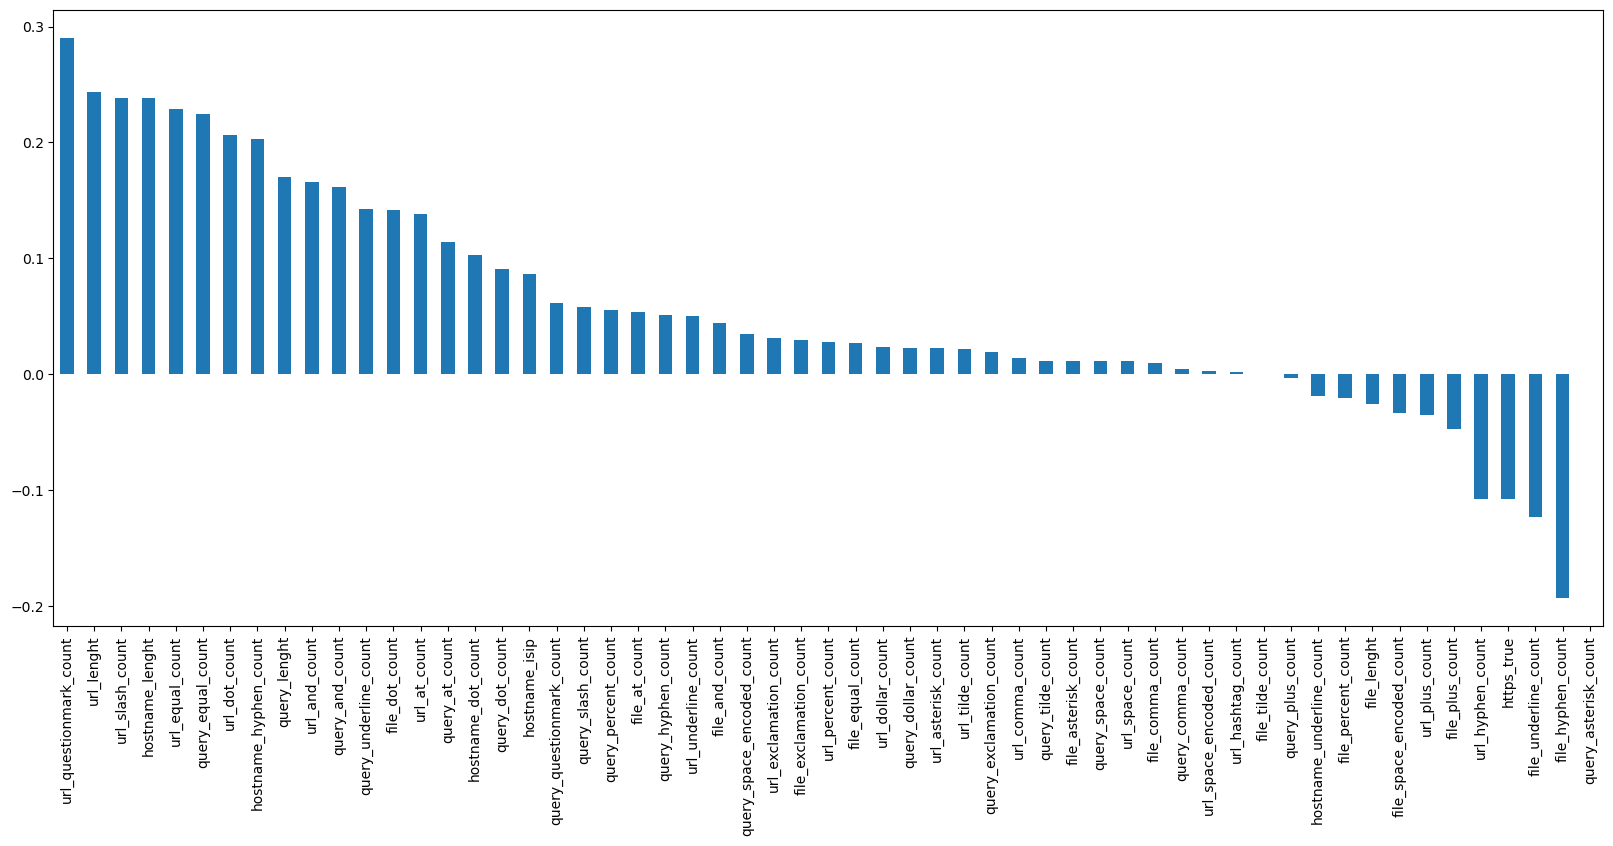

In [253]:
r,p=pointbiserialrcorr(X_train,y_train)
test =pd.Series(r)
test.index = X_train.columns
plot =test.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [150]:
a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.arange(7)

In [155]:
a

array([0, 0, 0, 1, 1, 1, 1])

In [154]:
b

array([0, 1, 2, 3, 4, 5, 6])

In [144]:
corr, p=stats.pointbiserialr(X_train_np,y_train_np)

ValueError: shapes (8001,57) and (8001,) not aligned: 57 (dim 1) != 8001 (dim 0)

In [221]:
pointbiserialrcorr(X_train_np_test,y_train_np)

In [208]:
len(X_train_np_test)

57

In [218]:
len(x_train_np_test[0])

8001

In [209]:
len(y_train_np)

8001

In [214]:
len(X_train_np_test[1])

8001

In [ ]:
stats.pointbiserialr(X_train_np_test,y_train_np)

In [ ]:
corr, p=stats.pointbiserialr(X_train_np_test,y_train_np)

corr, p=stats.pointbiserialr(X_train_np_test,y_train_np)

matrix.reshape(1,-1)

In [157]:
X_train

https_true  \
url                                                                                                                                                                      
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas                                                                                                                         1   
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html                                                                             0   
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php                                                                             0   
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834           1   
http://sloaneandhyde.com/imm/new2015/document.php                                                                                                                    0   
...                                                                                                                                                                ...   
http://psychologydictionary.org/passivity-phenomena/                                                                                                                 0   
http://staging.dev.xn--blockchin-c2d.com/                                                                                                                            0   
http://demo.kinomilenium.mk/user.php                                                                                                                                 0   
https://but-malte.web.app/                                                                                                                                           1   
http://flint.cs.yale.edu/cs422/doc/art-of-asm/pdf/CH21.PDF                                                                                                           0   

                                                                                                                                                            url_lenght  \
url                                                                                                                                                                      
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas                                                                                                                        44   
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html                                                                            88   
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php                                                                            88   
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834         154   
http://sloaneandhyde.com/imm/new2015/document.php                                                                                                                   49   
...                                                                                                                                                                ...   
http://psychologydictionary.org/passivity-phenomena/                                                                                                                52   
http://staging.dev.xn--blockchin-c2d.com/                                                                                                                           41   
http://demo.kinomilenium.mk/user.php                                                                                                                                36   
https://but-malte.web.app/                                                 

In [164]:
X_train_np_test

array([[ 1, 44,  2, ...,  0,  0, 12],
       [ 2,  0,  0, ...,  0,  0,  0],
       [15,  3,  0, ...,  1,  1,  4],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [200]:
X_train_np_test=X_train_np.T

In [202]:
X_train_np_test.shape

(57, 8001)

In [173]:
X_train_np.shape((-1,1))

TypeError: 'tuple' object is not callable

In [190]:
X_train_np.reshape((8001,1))

ValueError: cannot reshape array of size 456057 into shape (8001,1)

In [146]:
x_train_np_test=X_train_np.reshape((57,8001))

In [141]:
y_train_np.reshape(-1).shape

(8001,)

In [142]:
y_train_np.shape

(8001,)

In [138]:
X_train_np_test.shape

(57, 8001)

In [130]:
X_train_np

array([[ 1, 44,  2, ...,  0,  0,  0],
       [ 0, 88,  8, ...,  0,  0,  0],
       [ 0, 88,  3, ...,  0,  0,  0],
       ...,
       [ 0, 36,  3, ...,  0,  0,  0],
       [ 1, 26,  2, ...,  0,  0,  0],
       [ 0, 58,  4, ...,  0,  0,  0]], dtype=int64)

In [187]:
X_train_np=X_train.to_numpy()

In [124]:
y_train_np=y_train.to_numpy()

In [127]:
X_train_np

array([[ 1, 44,  2, ...,  0,  0,  0],
       [ 0, 88,  8, ...,  0,  0,  0],
       [ 0, 88,  3, ...,  0,  0,  0],
       ...,
       [ 0, 36,  3, ...,  0,  0,  0],
       [ 1, 26,  2, ...,  0,  0,  0],
       [ 0, 58,  4, ...,  0,  0,  0]], dtype=int64)

In [ ]:
pointbiserialrcorr(features_np,label_np)

In [113]:
features_np=features.to_numpy()

In [114]:
label_np=label.to_numpy()

In [117]:
features

https_true  \
url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                                   0   
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                           0   
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_                                                                                                                                                                                                                                                                                                                                                                          1   
http://rgipt.ac.in                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      0   
http://www.iracing.com/tracks/gateway-motorsports-park/                                                                                                                                                                                                                                                                                                                                                                                                                                                 0   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
http://www.fontspace.com/category/blackletter                                                                                                                                                                                                                                                                                                                                                                                                                                                           0   
http://www.budgetbots.com/server.php/Serve

In [116]:
features_np[1]

array([ 0, 77,  1,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 23,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int64)

In [112]:
type(label_np)

method

In [103]:
def pointbiserialrcorr(features,label):
    corr_value=np.empty((0, 0))
    p_value=corr_value=np.empty((0, 0))
    for i in range(len(features)):
        print(features.shape)
        print(label.shape)
        #corr, p=stats.pointbiserialr(features.iloc[:,i],label)
        print(features[i])
        print(label)
        # corr, p=stats.pointbiserialr(features[i],label)
        # corr=abs(corr)
        # corr=abs(corr)
        # corr_value=np.append(corr_value,corr)
        # p_value=np.append(p_value,p)
        # corr_value.append(corr)
        # p_value.append(p)
        # print(corr_value)
        # print(p_value)
    #return corr_value,p_value

In [118]:
pointbiserialrcorr(features_np,label_np)

(11430, 57)
(11430,)
[ 0 37  3  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  2  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  1  0  0  0
  0  0  0  0  0  0  0  0  0]
[0 1 1 ... 0 0 1]
(11430, 57)
(11430,)
[ 0 77  1  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0 23  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0
  0  0  0  0  0  0  0  0  0]
[0 1 1 ... 0 0 1]
(11430, 57)
(11430,)
[  1 126   4   2   1   5   1   3   0   2   0   0   0   0   0   0   0   0
   0   0  50   4   0   1   0  47   0   2   0   0   0   3   0   2   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
[0 1 1 ... 0 0 1]
(11430, 57)
(11430,)
[ 0 18  2  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  2  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0]
[0 1 1 ... 0 0 1]
(11430, 57)
(11430,)
[ 0 55  2  0  2  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  

(array([], shape=(0, 0), dtype=float64),
 array([], shape=(0, 0), dtype=float64))

In [57]:
r

array([-0.11466907,  0.248482  ,  0.20696508,  0.03809134, -0.1001075 ,
        0.24226996,  0.29431907,  0.2333863 ,  0.14291457,  0.17054638,
        0.03552473,  0.00935397, -0.00513417,  0.01186465,  0.0310889 ,
       -0.03471057,  0.02646512,  0.00265139,  0.02496206,  0.02810129,
        0.2383224 ,  0.10262215, -0.0204214 ,  0.18074209,  0.09251527,
        0.17789342,  0.09216776,  0.14575768,  0.04445223,  0.05902115,
        0.06185689,  0.22942476,  0.11717532,  0.1653958 ,  0.01620297,
        0.00935397,  0.03976464,  0.01297319,  0.0125501 , -0.00893351,
        0.01322909,  0.02303298,  0.05414633, -0.02983075,  0.14037972,
       -0.13142166, -0.19521613,  0.02438137,  0.05202855,  0.04517522,
        0.03624997, -0.02553313,  0.0045664 ,  0.00540099, -0.04611847,
        0.00935397, -0.00694371])

In [65]:
#features.iloc[:,2]

url
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                             0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                     0
https://support-appleld.com.

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


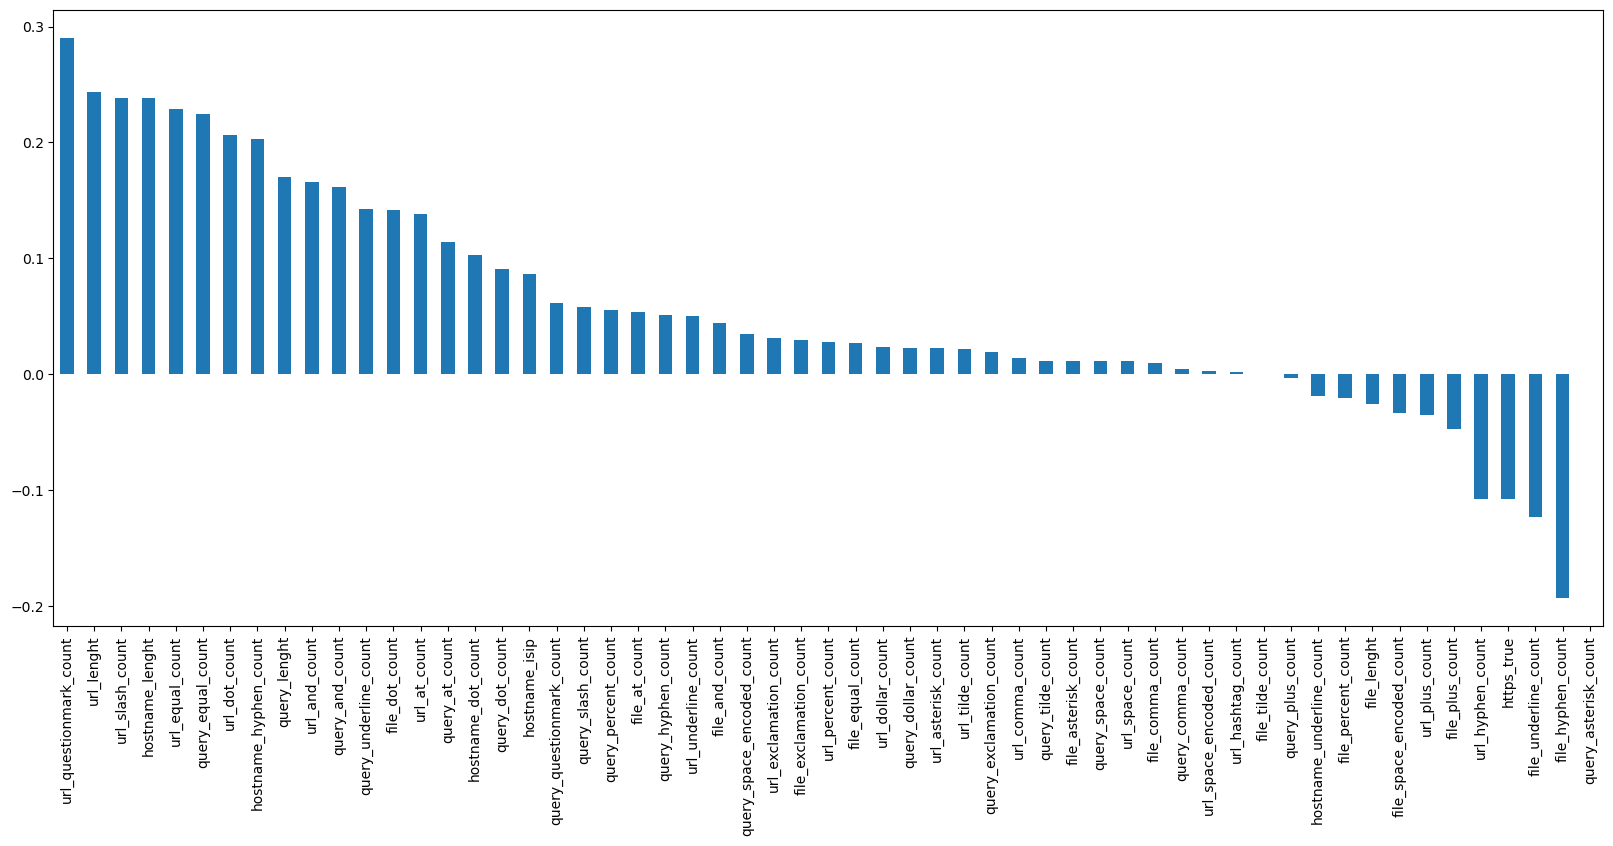

In [261]:
mi=SelectKBest(score_func=pointbiserialrcorr, k='all')
mi.fit_transform(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

<Axes: >

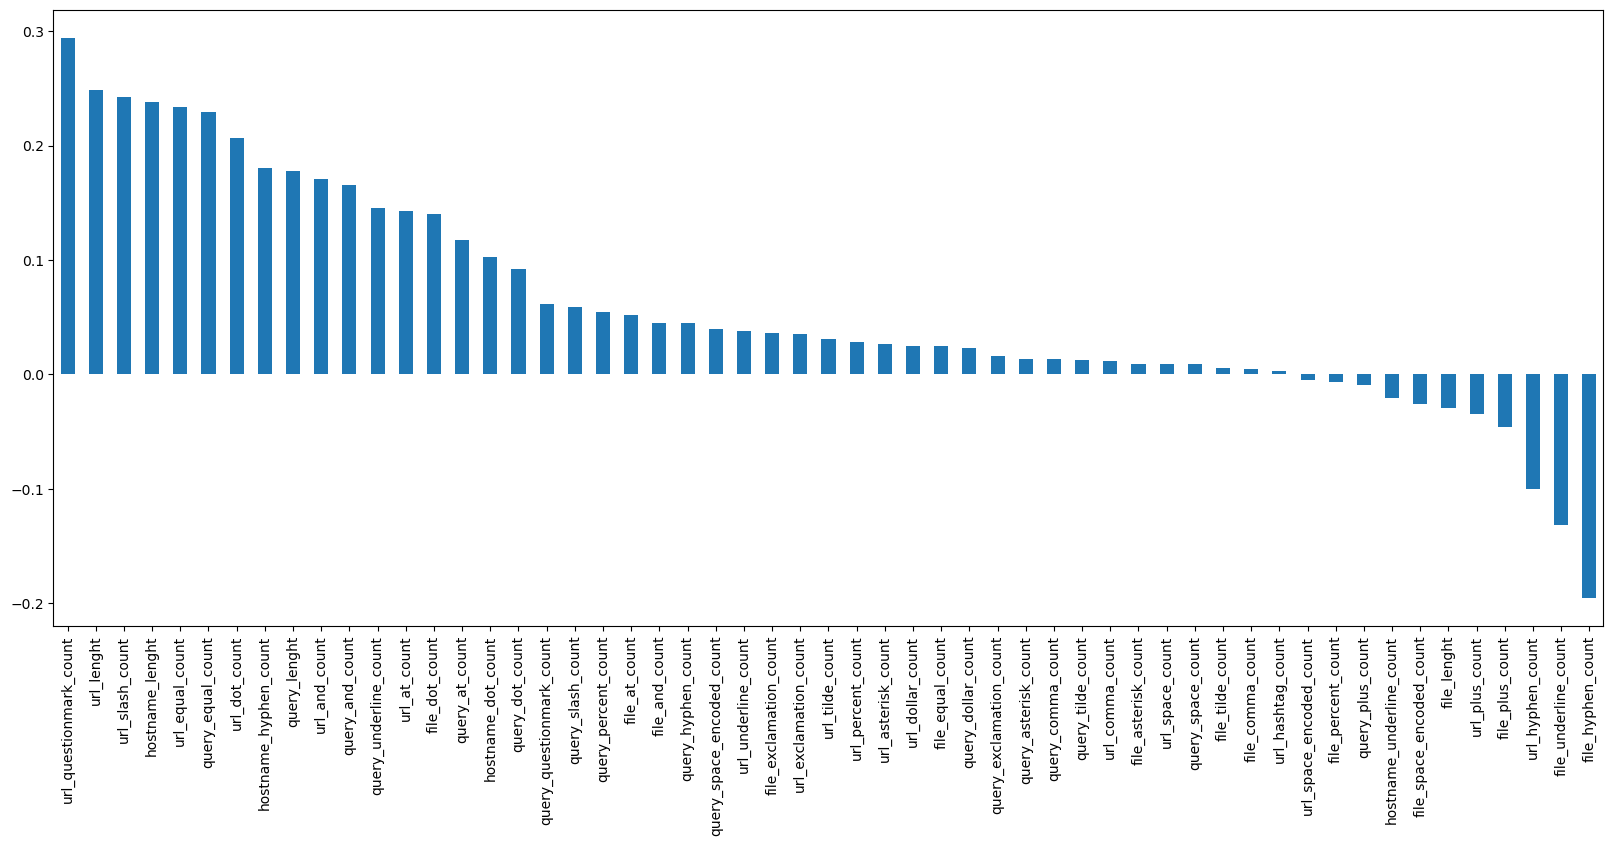

In [88]:
#test.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
new_columns

In [ ]:
test

In [ ]:
#r,p=pointbiserialrcorr(features,label)

In [126]:

#stats.pointbiserialr(cleaned_df.iloc[:,0],cleaned_df.iloc[:,1])

SignificanceResult(statistic=0.2484820019691818, pvalue=2.1043028309225086e-160)

In [7]:
#cleaned_df.set_index('url',inplace=True)
features=cleaned_df.loc[:,'url_lenght':]
label=cleaned_df.loc[:,'phishing']

In [9]:
#cleaned_df.set_index('url',inplace=True)
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [123]:
#selectorpoint=PointBiserialCorrSelector()

In [133]:
#selectorpoint.pointBiserialCorr(cleaned_df,'hostname_dot_count','phishing')

-0.10262215154266235

In [107]:
#selectorpoint.min_corr 

0

In [111]:
#new_columns = selectorpoint.select(cleaned_df, 'phishing')

In [112]:
#new_columns

['url_lenght',
 'url_dot_count',
 'url_slash_count',
 'url_questionmark_count',
 'url_equal_count',
 'hostname_lenght',
 'query_equal_count',
 'url_hyphen_count',
 'url_at_count',
 'url_and_count',
 'hostname_dot_count',
 'hostname_hyphen_count',
 'query_lenght',
 'query_underline_count',
 'query_at_count',
 'query_and_count',
 'file_dot_count',
 'file_underline_count',
 'file_hyphen_count']

In [60]:
test  = r_regression(X_train,y_train)

In [96]:
test.shape

(57,)

In [97]:
r.shape

(57,)

In [48]:
f_statistic, p_values = f_regression(X_train,y_train)

In [58]:
f_statistic

array([9.44348628e+01, 5.05597304e+02, 3.54648705e+02, 2.00189342e+01,
       9.43792252e+01, 4.83519502e+02, 7.36925888e+02, 4.42253819e+02,
       1.55897353e+02, 2.27337694e+02, 7.69708530e+00, 9.91288119e-01,
       5.83522006e-02, 1.57220309e+00, 3.89824107e+00, 9.83490828e+00,
       3.96811597e+00, 2.41906052e-02, 4.53563537e+00, 6.00921409e+00,
       4.82806463e+02, 8.62939719e+01, 2.80344176e+00, 3.43596947e+02,
       6.03638864e+01, 2.38804736e+02, 6.61928429e+01, 1.65439529e+02,
       2.09505033e+01, 2.71819186e+01, 3.00370831e+01, 4.24412425e+02,
       1.04911953e+02, 2.13544050e+02, 2.97534573e+00, 9.91288119e-01,
       9.78383510e+00, 1.94788701e-01, 9.91288119e-01, 9.88434500e-02,
       0.00000000e+00, 4.05839234e+00, 2.47027826e+01, 5.16624264e+00,
       1.64330449e+02, 1.23474528e+02, 3.08856900e+02, 5.66214381e+00,
       2.29841522e+01, 1.59139256e+01, 6.94939681e+00, 9.12458972e+00,
       8.10976052e-01, 3.82724140e-05, 1.77301319e+01, 9.91288119e-01,
      

In [49]:
type(f_statistic)

numpy.ndarray

In [71]:
features_new=features.loc[:, mi.get_support()]

In [73]:
features.columns

Index(['https_true', 'url_lenght', 'url_dot_count', 'url_underline_count',
       'url_hyphen_count', 'url_slash_count', 'url_questionmark_count',
       'url_equal_count', 'url_at_count', 'url_and_count',
       'url_exclamation_count', 'url_space_count', 'url_space_encoded_count',
       'url_comma_count', 'url_tilde_count', 'url_plus_count',
       'url_asterisk_count', 'url_hashtag_count', 'url_dollar_count',
       'url_percent_count', 'hostname_lenght', 'hostname_dot_count',
       'hostname_underline_count', 'hostname_hyphen_count', 'hostname_isip',
       'query_lenght', 'query_dot_count', 'query_underline_count',
       'query_hyphen_count', 'query_slash_count', 'query_questionmark_count',
       'query_equal_count', 'query_at_count', 'query_and_count',
       'query_exclamation_count', 'query_space_count',
       'query_space_encoded_count', 'query_comma_count', 'query_tilde_count',
       'query_plus_count', 'query_asterisk_count', 'query_dollar_count',
       'query_percent

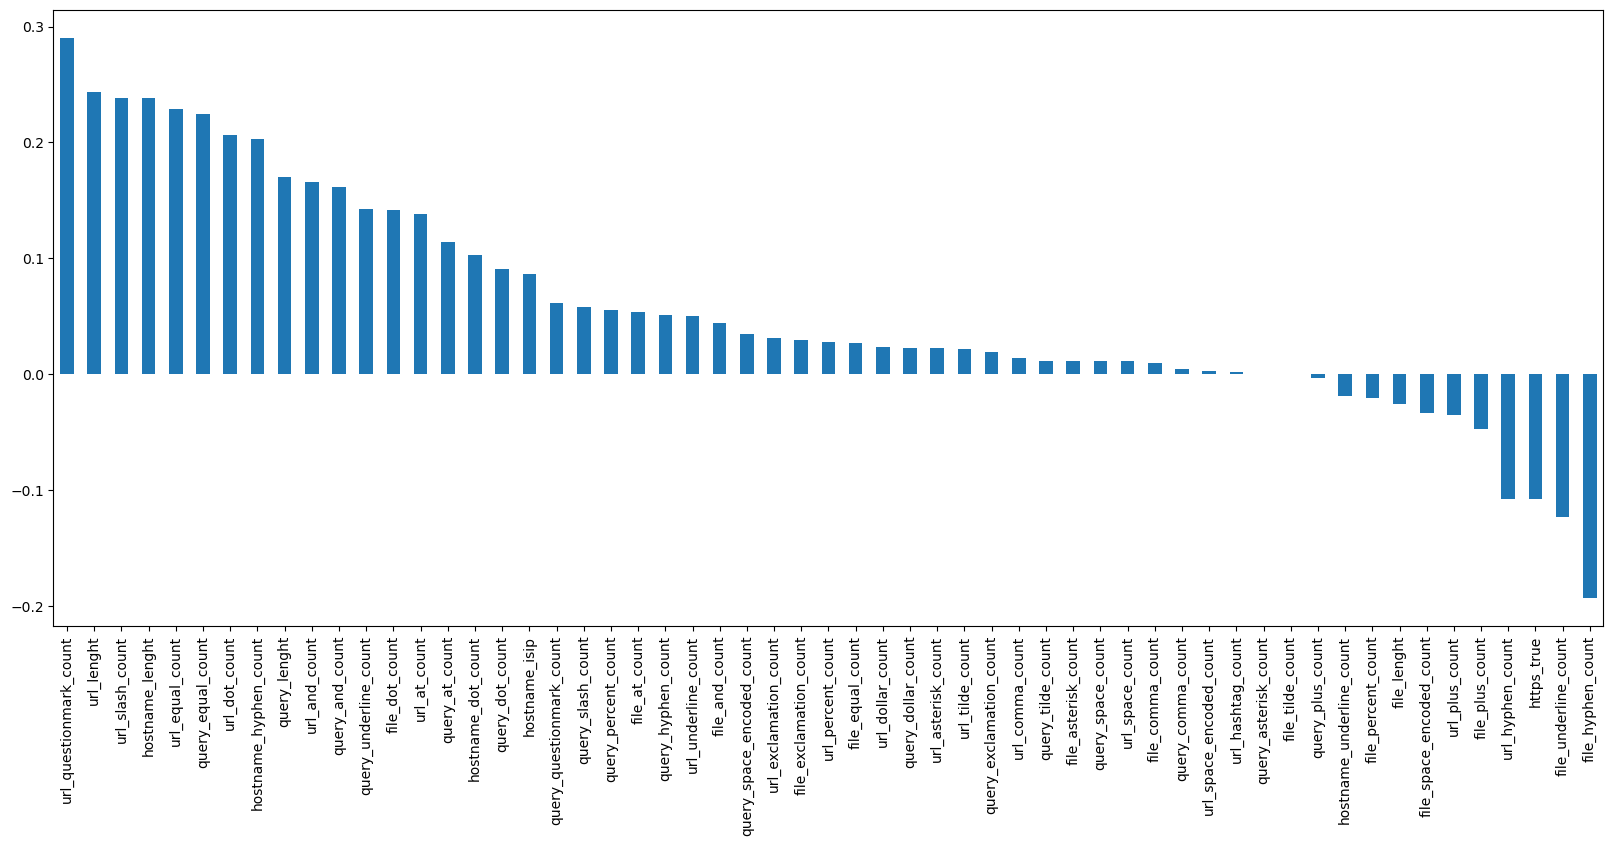

In [278]:
re=SelectKBest(score_func=r_regression, k=20)
test_x=re.fit_transform(X_train,y_train)
mutual_info = pd.Series(re.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
#fig = plot.get_figure()
#fig.savefig("PoC_Pearsons_Correlation_Filter.png",dpi=300, bbox_inches = "tight")

In [279]:
X_train.loc[:, re.get_support()].columns

Index(['url_lenght', 'url_dot_count', 'url_slash_count',
       'url_questionmark_count', 'url_equal_count', 'url_at_count',
       'url_and_count', 'hostname_lenght', 'hostname_dot_count',
       'hostname_hyphen_count', 'hostname_isip', 'query_lenght',
       'query_dot_count', 'query_underline_count', 'query_slash_count',
       'query_questionmark_count', 'query_equal_count', 'query_at_count',
       'query_and_count', 'file_dot_count'],
      dtype='object')

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


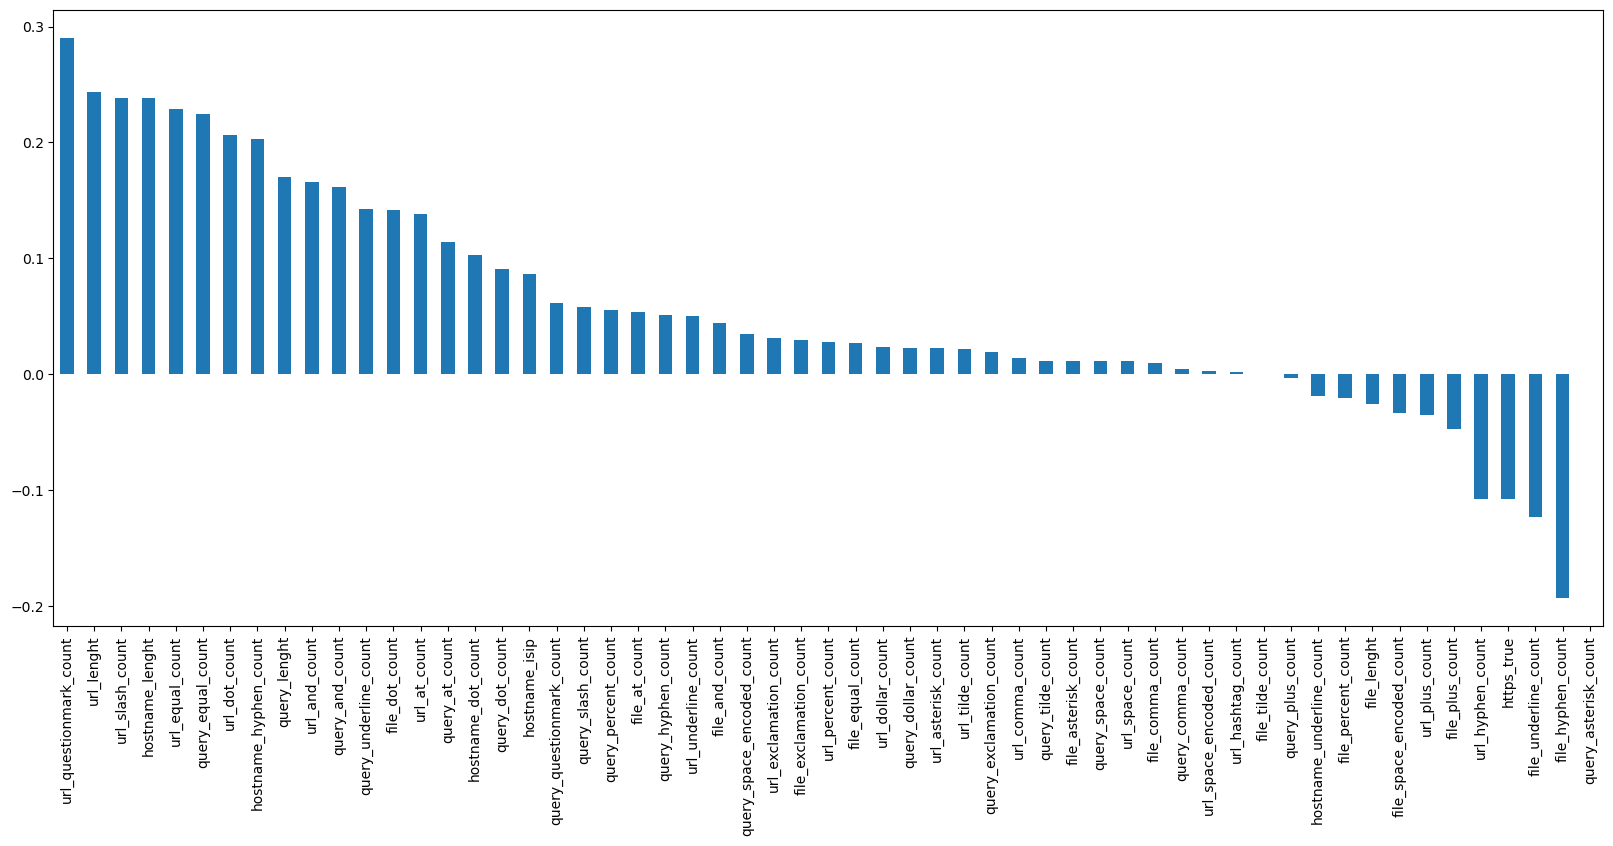

In [275]:
mi=SelectKBest(score_func=pointbiserialrcorr, k=20)
x_new_trans=mi.fit_transform(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
#fig = plot.get_figure()
#fig.savefig("PoC_Pearsons_Correlation_Filter.png",dpi=300, bbox_inches = "tight")

In [277]:
X_train.loc[:, mi.get_support()].columns

Index(['url_lenght', 'url_dot_count', 'url_slash_count',
       'url_questionmark_count', 'url_equal_count', 'url_at_count',
       'url_and_count', 'hostname_lenght', 'hostname_dot_count',
       'hostname_hyphen_count', 'hostname_isip', 'query_lenght',
       'query_dot_count', 'query_underline_count', 'query_slash_count',
       'query_questionmark_count', 'query_equal_count', 'query_at_count',
       'query_and_count', 'file_dot_count'],
      dtype='object')

In [237]:
y_train.shape

(8001,)

In [259]:
test_x=mi.fit_transform(X_train,y_train)

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [260]:
test

https_true                  -0.108019
url_lenght                   0.243823
url_dot_count                0.206045
url_underline_count          0.049964
url_hyphen_count            -0.107987
url_slash_count              0.238751
url_questionmark_count       0.290441
url_equal_count              0.228893
url_at_count                 0.138264
url_and_count                0.166239
url_exclamation_count        0.031005
url_space_count              0.011132
url_space_encoded_count      0.002701
url_comma_count              0.014018
url_tilde_count              0.022070
url_plus_count              -0.035043
url_asterisk_count           0.022267
url_hashtag_count            0.001739
url_dollar_count             0.023806
url_percent_count            0.027399
hostname_lenght              0.238585
hostname_dot_count           0.103310
hostname_underline_count    -0.018718
hostname_hyphen_count        0.202943
hostname_isip                0.086544
query_lenght                 0.170261
query_dot_co

In [94]:
X_train.shape

(8001, 57)

In [95]:
y_train.shape

(8001,)

In [79]:
r,p=pointbiserialrcorr(features,label)

url
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                            0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                    0
https://support-appleld.com.se

In [75]:
test=r_regression(X_train,y_train)

In [80]:
type(r)

numpy.ndarray

In [81]:
r

array([-0.11466907,  0.248482  ,  0.20696508,  0.03809134, -0.1001075 ,
        0.24226996,  0.29431907,  0.2333863 ,  0.14291457,  0.17054638,
        0.03552473,  0.00935397, -0.00513417,  0.01186465,  0.0310889 ,
       -0.03471057,  0.02646512,  0.00265139,  0.02496206,  0.02810129,
        0.2383224 ,  0.10262215, -0.0204214 ,  0.18074209,  0.09251527,
        0.17789342,  0.09216776,  0.14575768,  0.04445223,  0.05902115,
        0.06185689,  0.22942476,  0.11717532,  0.1653958 ,  0.01620297,
        0.00935397,  0.03976464,  0.01297319,  0.0125501 , -0.00893351,
        0.01322909,  0.02303298,  0.05414633, -0.02983075,  0.14037972,
       -0.13142166, -0.19521613,  0.02438137,  0.05202855,  0.04517522,
        0.03624997, -0.02553313,  0.0045664 ,  0.00540099, -0.04611847,
        0.00935397, -0.00694371])

In [82]:
test

array([-1.08018897e-01,  2.43823464e-01,  2.06044528e-01,  4.99643056e-02,
       -1.07987443e-01,  2.38750651e-01,  2.90440674e-01,  2.28892897e-01,
        1.38264320e-01,  1.66238824e-01,  3.10053366e-02,  1.11315385e-02,
        2.70090424e-03,  1.40182499e-02,  2.20704251e-02, -3.50429361e-02,
        2.22672525e-02,  1.73902114e-03,  2.38055448e-02,  2.73985715e-02,
        2.38584573e-01,  1.03309991e-01, -1.87176719e-02,  2.02942972e-01,
        8.65442491e-02,  1.70261212e-01,  9.05937295e-02,  1.42349667e-01,
        5.11106479e-02,  5.81949841e-02,  6.11641784e-02,  2.24465713e-01,
        1.13779790e-01,  1.61251915e-01,  1.92828008e-02,  1.11315385e-02,
        3.49519392e-02,  4.93467715e-03,  1.11315385e-02, -3.51522733e-03,
        0.00000000e+00,  2.25189959e-02,  5.54862689e-02, -2.54055938e-02,
        1.41881357e-01, -1.23294728e-01, -1.92812040e-01,  2.65961605e-02,
        5.35270544e-02,  4.45593893e-02,  2.94623331e-02, -3.37552448e-02,
        1.00684856e-02, -

In [78]:
type(test)

numpy.ndarray

In [ ]:
pointbiserialrcorr

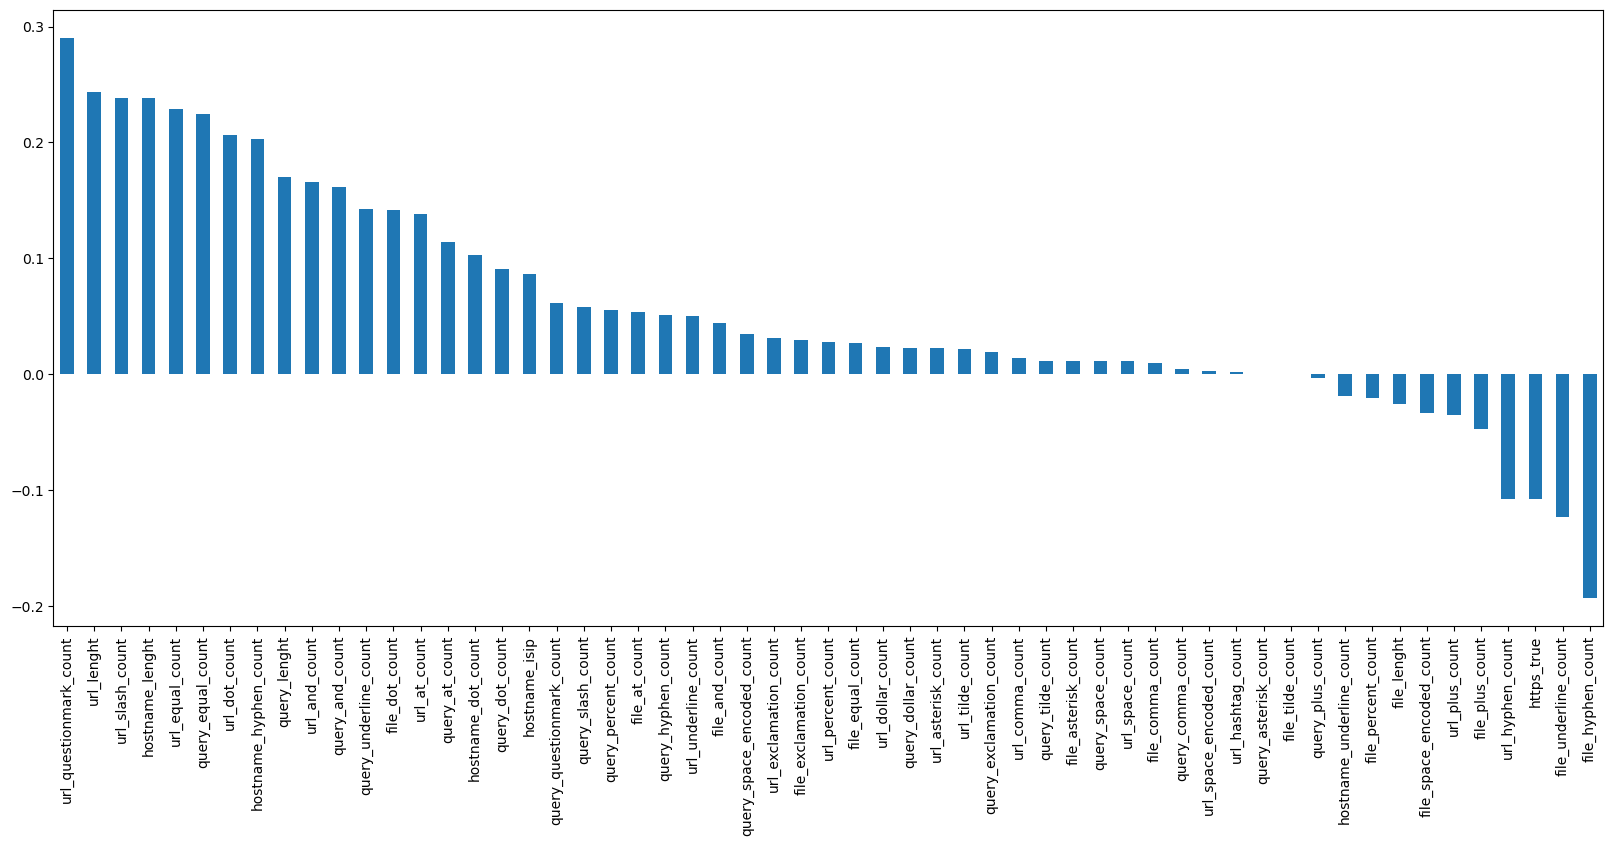

In [262]:
mi=SelectKBest(score_func=r_regression, k=20)
test_x=mi.fit_transform(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
#fig = plot.get_figure()
#fig.savefig("PoC_Pearsons_Correlation_Filter.png",dpi=300, bbox_inches = "tight")

In [264]:
test_x.shape

(8001, 20)

In [67]:
X_regression

array([[44,  2,  3, ...,  0,  0,  0],
       [88,  8,  6, ...,  0,  0,  1],
       [88,  3,  6, ...,  0,  0,  1],
       ...,
       [36,  3,  3, ...,  0,  0,  1],
       [26,  2,  3, ...,  0,  0,  0],
       [58,  4,  7, ...,  0,  0,  1]], dtype=int64)

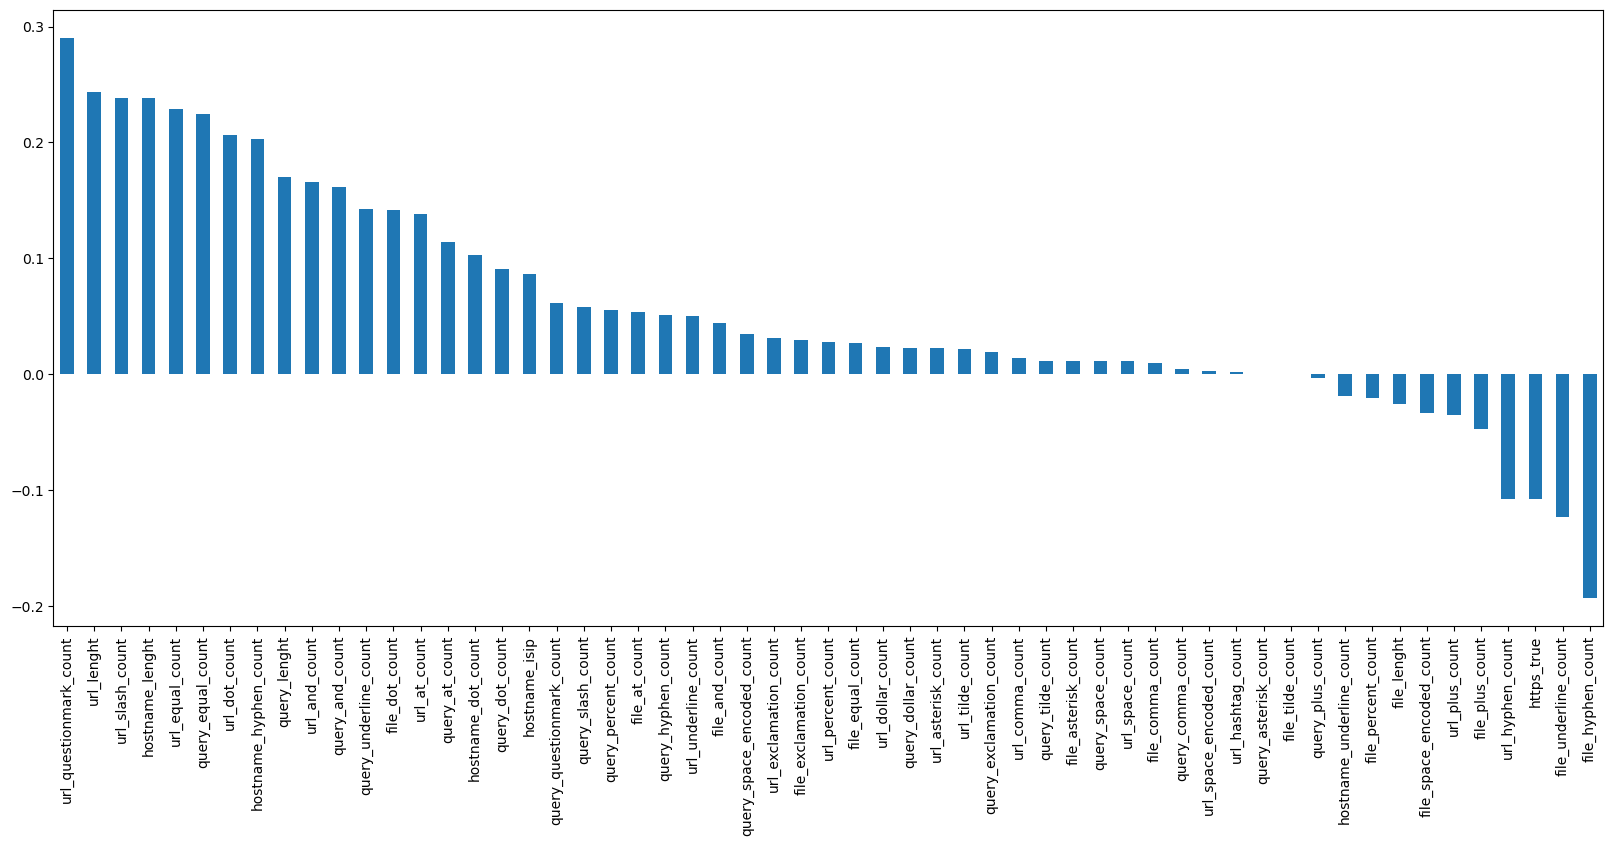

In [62]:
mi=SelectKBest(score_func=r_regression, k='all')
mi.fit(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
#fig = plot.get_figure()
#fig.savefig("PoC_Pearsons_Correlation_Filter.png",dpi=300, bbox_inches = "tight")

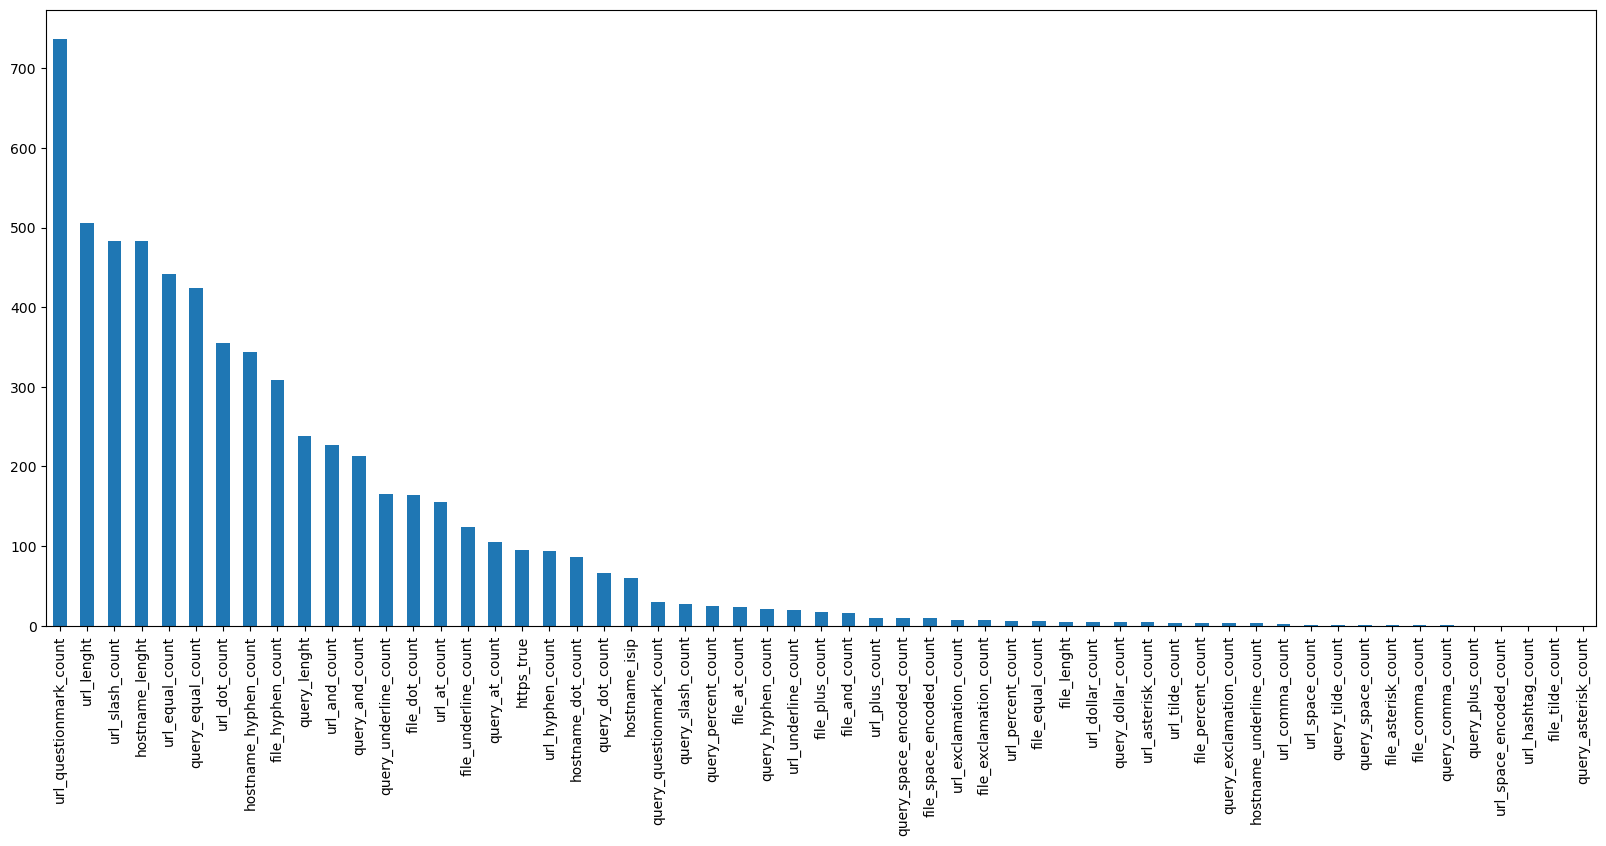

In [47]:
mi=SelectKBest(score_func=f_regression, k='all')
mi.fit(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Pearsons_Correlation_Filter.png",dpi=300, bbox_inches = "tight")

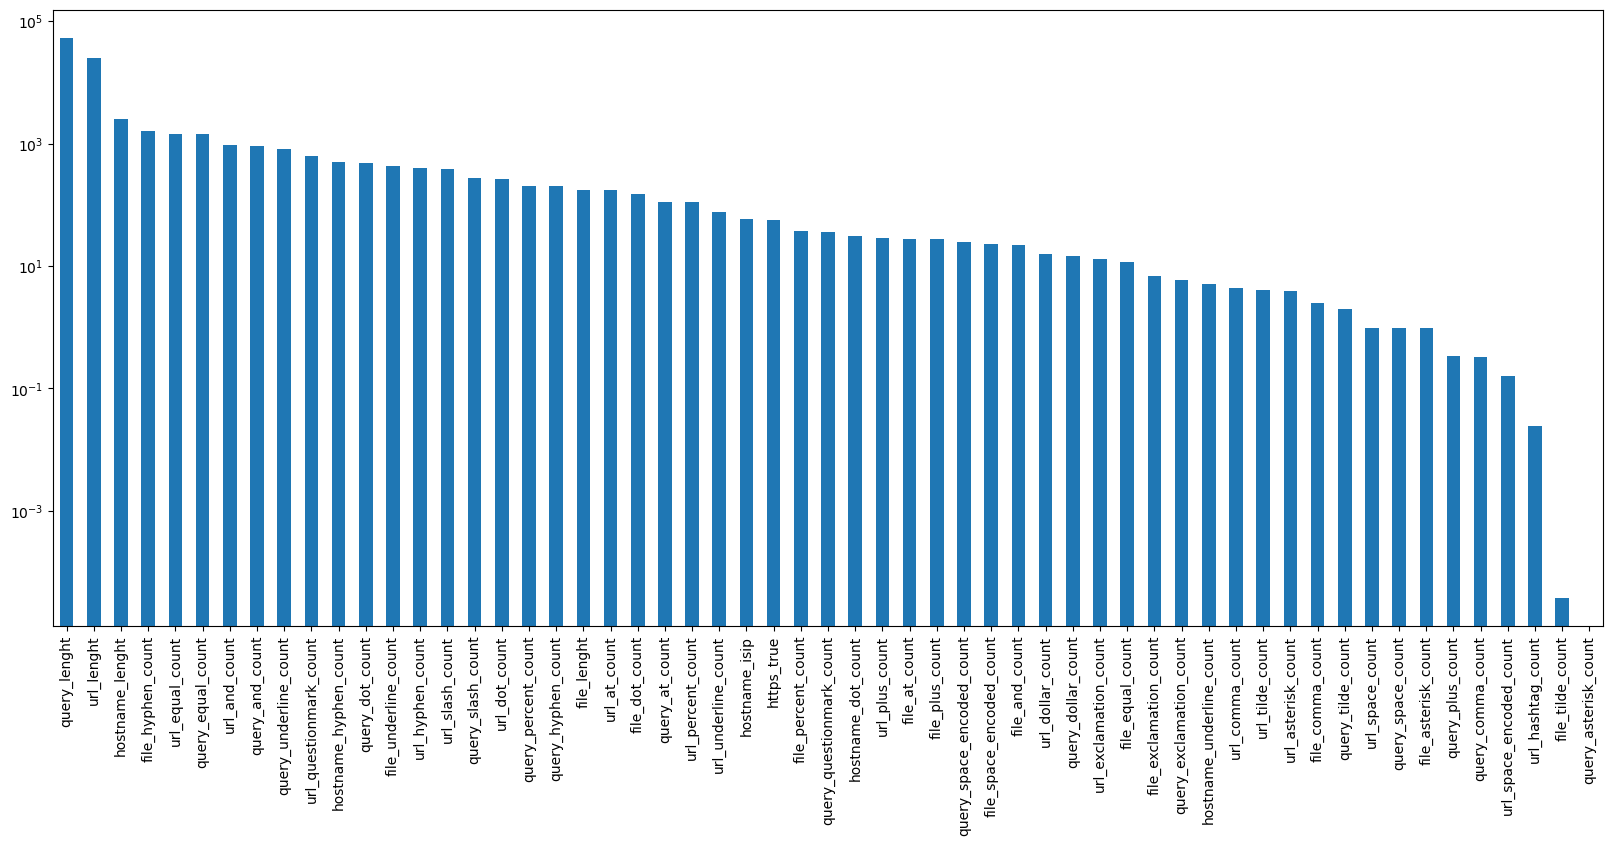

In [11]:
mi=SelectKBest(score_func=chi2, k='all')
mi.fit(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8),logy=True)
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_chi_square_Filter_log.png",dpi=300, bbox_inches = "tight")

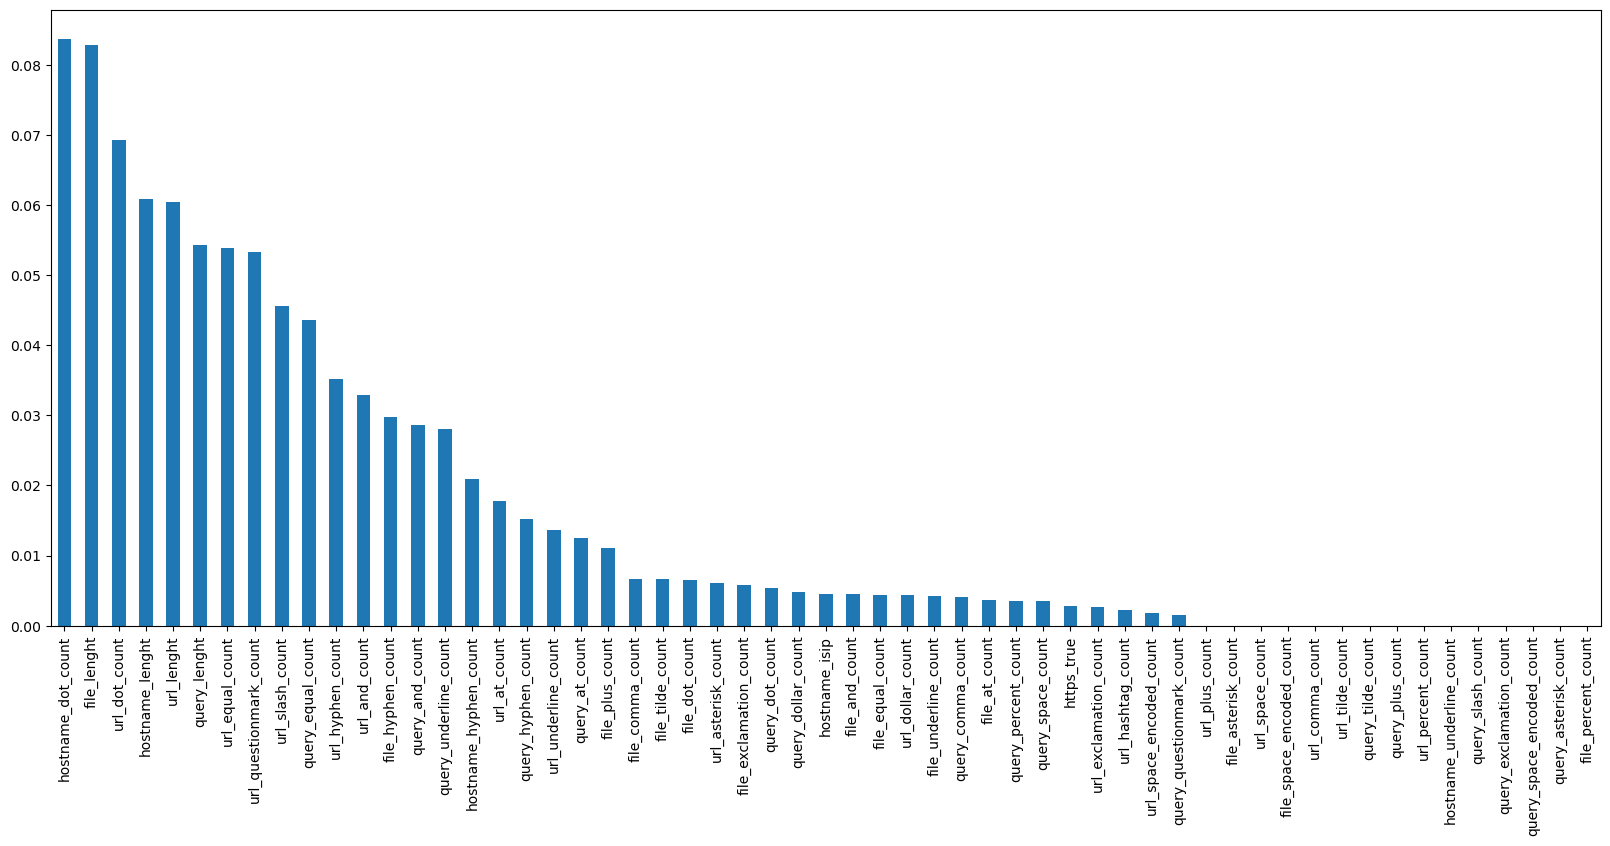

In [65]:
mi=SelectKBest(score_func=mutual_info_classif, k=10)
mi.fit(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Mutual_info_Filter.png",dpi=300, bbox_inches = "tight")

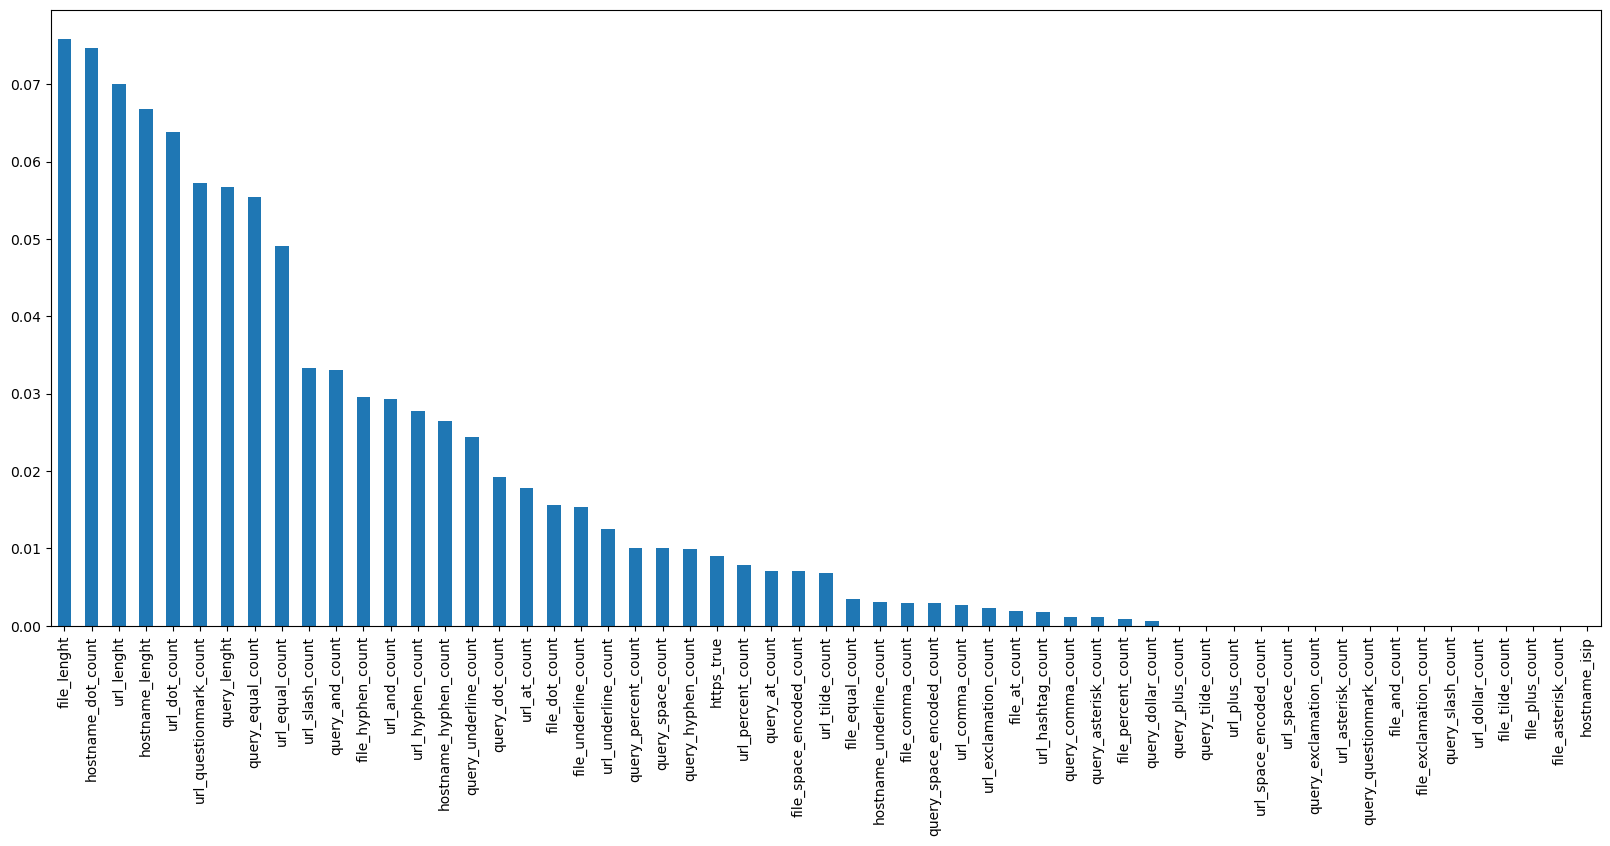

In [38]:
mi=SelectKBest(score_func=mutual_info_classif, k='all')
mi.fit(X_train,y_train)
mutual_info = pd.Series(mi.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Mutual_info_Filter.png",dpi=300, bbox_inches = "tight")

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


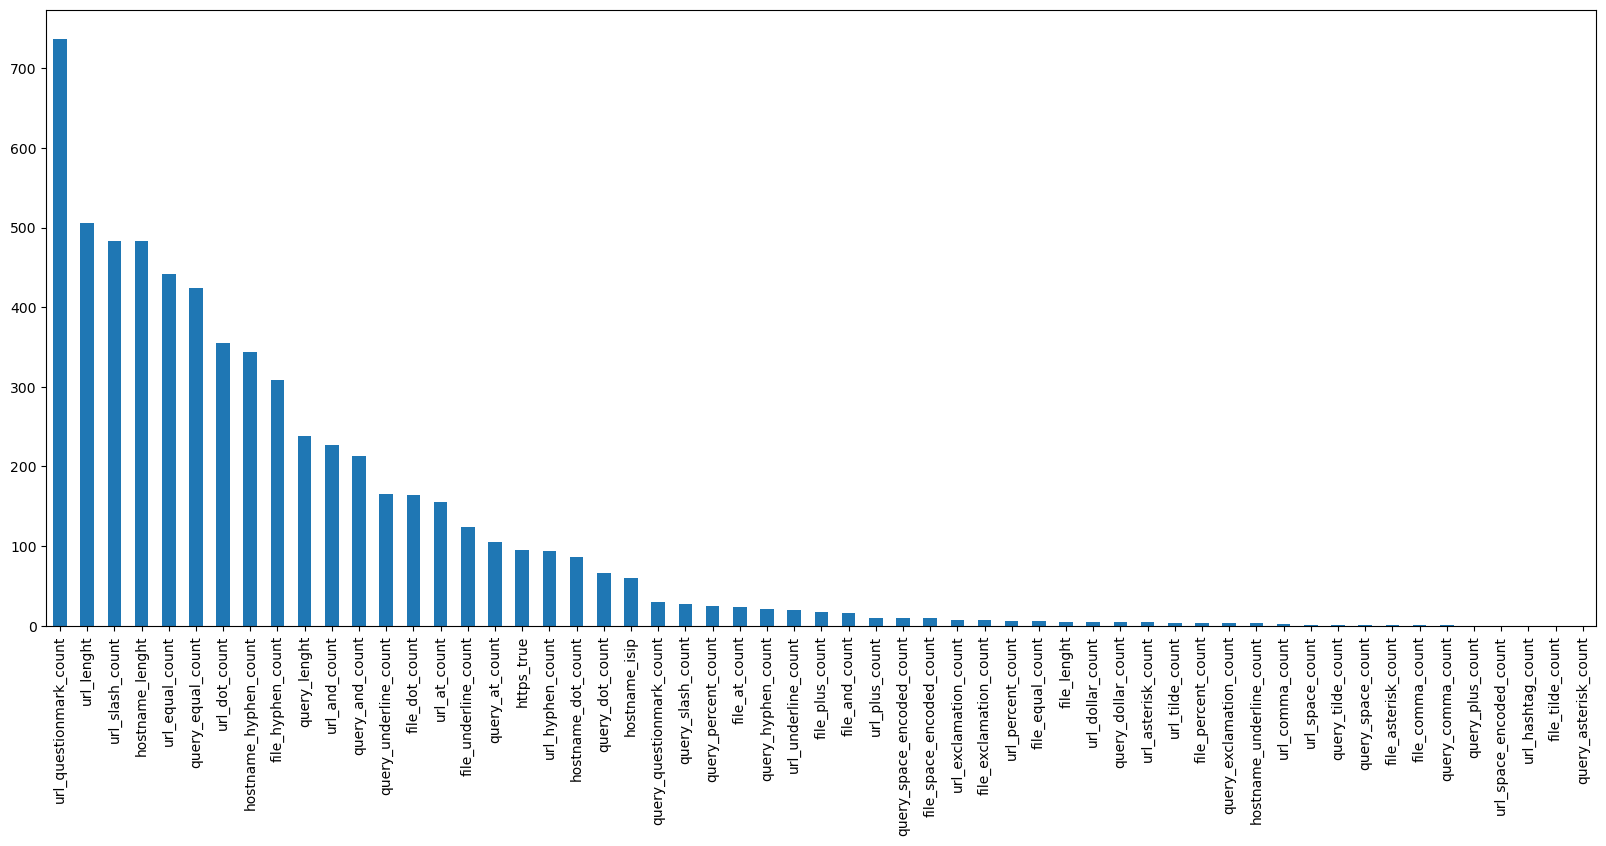

In [36]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train,y_train)
anova =pd.Series(fs.scores_)
anova.index = X_train.columns
plot =anova.sort_values(ascending=False).plot.bar(figsize=(20, 8))
#anova.sort_values(ascending=False).figure_.savefig('PoC_Anova_Filter.png')
fig = plot.get_figure()
fig.savefig("PoC_Anova_Filter.png",dpi=300, bbox_inches = "tight")

In [40]:

#anova.sort_values(ascending=False)

In [74]:
anova

url_lenght                    752.035660
url_dot_count                 511.419604
url_underline_count            16.605549
url_hyphen_count              115.685173
url_slash_count               712.588615
url_questionmark_count       1083.820367
url_equal_count               658.332459
url_at_count                  238.278772
url_and_count                 342.353274
url_exclamation_count          14.440435
url_space_count                 1.000000
url_space_encoded_count         0.301247
url_comma_count                 1.608944
url_tilde_count                11.056074
url_plus_count                 13.785335
url_asterisk_count              8.009813
url_hashtag_count               0.080338
url_dollar_count                7.125276
url_percent_count               9.031624
hostname_lenght               688.168930
hostname_dot_count            121.632716
hostname_underline_count        4.767847
hostname_hyphen_count         385.934080
query_lenght                  373.470152
query_dot_count 

In [54]:
anova1 =pd.Series(fs.scores_)

In [26]:
fs.scores_

AttributeError: 'SelectKBest' object has no attribute 'scores_'

<Axes: >

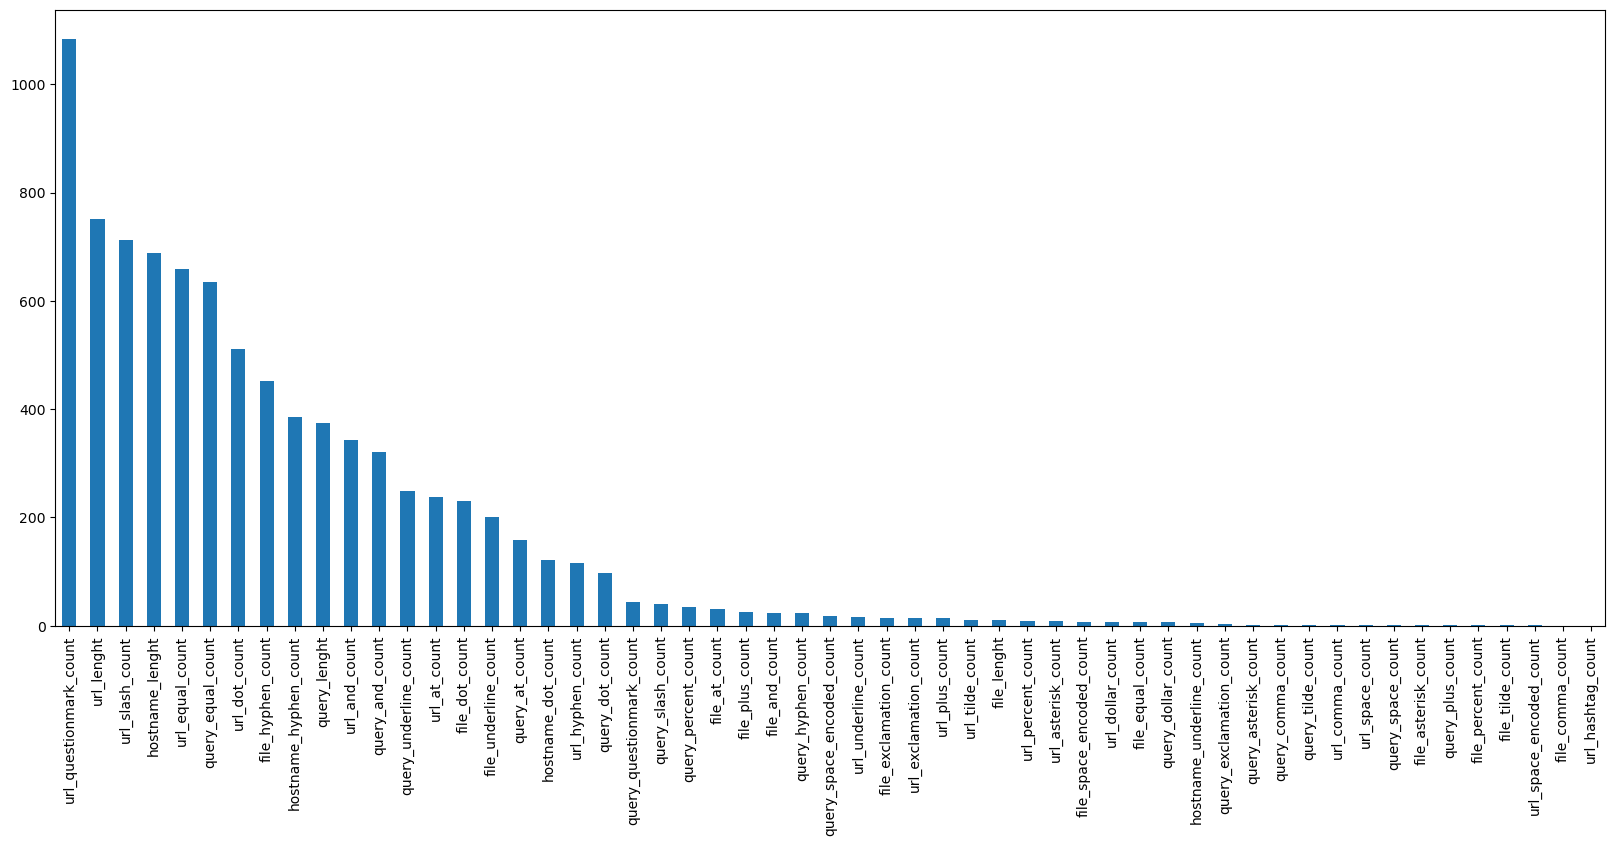

In [41]:
anova.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [30]:
features=fs.fit_transform(features, label)

In [31]:
features.shape[1]

55

In [34]:
X_train

array([[44,  2,  0, ...,  0,  0,  0],
       [88,  8,  0, ...,  0,  0,  0],
       [88,  3,  0, ...,  0,  0,  0],
       ...,
       [36,  3,  0, ...,  0,  0,  0],
       [26,  2,  0, ...,  0,  0,  0],
       [58,  4,  0, ...,  0,  0,  0]], dtype=int64)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [88]:
selector = PointBiserialCorrSelector()


In [112]:
selector

0.8

In [105]:
new_columns = selector.select(cleaned_df, 'phishing')

In [205]:
selector = VarianceThreshold(threshold=0.00)
selector.fit_transform(cleaned_df)


array([[  0,   0,  37, ...,   0,   0,   0],
       [  1,   0,  77, ...,   0,   0,   0],
       [  1,   1, 126, ...,   0,   0,   0],
       ...,
       [  0,   1, 105, ...,   0,   0,   0],
       [  0,   0,  38, ...,   0,   0,   0],
       [  1,   0, 477, ...,   0,   0,   0]], dtype=int64)

In [130]:
for feature in zip(features, selector.variances_):
    print(feature)

('https_true', 0.23769317439869445)
('url_lenght', 1629.0)
('url_dot_count', 1.875872873721056)
('url_underline_count', 1.1952783154949027)
('url_hyphen_count', 4.3555495545559)
('url_slash_count', 3.542560023391651)
('url_questionmark_count', 0.13281639007722462)
('url_equal_count', 0.9965501064335462)
('url_at_count', 0.024178088850004865)
('url_and_count', 0.6745361280846018)
('url_exclamation_count', 0.003493561555024344)
('url_space_count', 8.74814095307203e-05)
('url_space_encoded_count', 0.1405440549152704)
('url_comma_count', 0.010657469216172999)
('url_tilde_count', 0.0071275342550685085)
('url_plus_count', 0.04065968131936263)
('url_asterisk_count', 0.0006994226334131682)
('url_hashtag_count', 0.004355317352610016)
('url_dollar_count', 0.00594555164418971)
('url_percent_count', 2.1502889205778413)
('hostname_lenght', 116.13725477228732)
('hostname_dot_count', 0.7414264161861657)
('hostname_underline_count', 0.0014866940844992806)
('hostname_hyphen_count', 0.4238708208280614)


In [133]:
threshold_info = pd.Series(selector.variances_)
threshold_info.index = X_train.columns

In [199]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True])

In [206]:
removed=cleaned_df.loc[:, ~selector.get_support()]

In [207]:
removed

hostname_slash_count  \
url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                                             0   
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                                     0   
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_                                                                                                                                                                                                                                                                                                                                                                                    0   
http://rgipt.ac.in                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                0   
http://www.iracing.com/tracks/gateway-motorsports-park/                                                                                                                                                                                                                                                                                                                                                                                                                                                           0   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ...   
http://www.fontspace.com/category/blackletter                                                                                                                                                                                                                                                                                                                                                                                                                          

In [152]:
removed

https_true  \
url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
http://www.crestonwood.com/router.php                                                                                                                                                                                                                                                                                                                                                                                                                                                                   0   
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4                                                                                                                                                                                                                                                                                                                                                                                                                           0   
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_                                                                                                                                                                                                                                                                                                                                                                          1   
http://rgipt.ac.in                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      0   
http://www.iracing.com/tracks/gateway-motorsports-park/                                                                                                                                                                                                                                                                                                                                                                                                                                                 0   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ...   
http://www.fontspace.com/category/blackletter                                                                                                                                                                                                                                                                                                                                                                                                                                                           0   
http://www.budgetbots.com/server.php/Serve

In [139]:
threshold_info

https_true                0.237693
url_lenght             1629.000000
url_dot_count             1.875873
url_underline_count       1.195278
url_hyphen_count          4.355550
                          ...     
file_plus_count           0.005758
file_asterisk_count       0.000087
file_hashtag_count        0.000000
file_dollar_count         0.000000
file_percent_count        0.552622
Length: 78, dtype: float64

In [136]:
X_data_new = selector.fit_transform(features)

In [138]:
X_data_new.shape[1]

57

In [223]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns


In [44]:
mutual_info['hostname_isip']

0.009891600456289673

In [122]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
#mutual_info.sort_values(ascending=False)

In [300]:
fs = SelectKBest(score_func=f_classif, k=35)

In [237]:
X_train

https_true  \
url                                                                                                                                                                      
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas                                                                                                                         1   
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html                                                                             0   
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php                                                                             0   
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834           1   
http://sloaneandhyde.com/imm/new2015/document.php                                                                                                                    0   
...                                                                                                                                                                ...   
http://psychologydictionary.org/passivity-phenomena/                                                                                                                 0   
http://staging.dev.xn--blockchin-c2d.com/                                                                                                                            0   
http://demo.kinomilenium.mk/user.php                                                                                                                                 0   
https://but-malte.web.app/                                                                                                                                           1   
http://flint.cs.yale.edu/cs422/doc/art-of-asm/pdf/CH21.PDF                                                                                                           0   

                                                                                                                                                            url_lenght  \
url                                                                                                                                                                      
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas                                                                                                                        44   
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html                                                                            88   
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php                                                                            88   
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834         154   
http://sloaneandhyde.com/imm/new2015/document.php                                                                                                                   49   
...                                                                                                                                                                ...   
http://psychologydictionary.org/passivity-phenomena/                                                                                                                52   
http://staging.dev.xn--blockchin-c2d.com/                                                                                                                           41   
http://demo.kinomilenium.mk/user.php                                                                                                                                36   
https://but-malte.web.app/                                                 

In [21]:
def hyperpara_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                     {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]}]
                    #{'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  grid=GridSearchCV(svm.SVC(),param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  grid.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(grid.best_estimator_)
  print('Best score for data:', grid.best_score_)
  print('Best C:',grid.best_estimator_.C) 
  print('Best Kernel:',grid.best_estimator_.kernel)
  print('Best Gamma:',grid.best_estimator_.gamma)
  #return model

In [22]:
hyperpara_opt(features,label)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=1000, gamma=0.001)
Best score for data: 0.8126860769210609
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.001


In [18]:
hyperpara_opt(X_train,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=100, gamma=0.01)
Best score for data: 0.8187739255372315
Best C: 100
Best Kernel: rbf
Best Gamma: 0.01


In [9]:
clf = svm.SVC(verbose=True)

In [242]:
clf1 = svm.SVC(verbose=True)
clf1.fit(X_new, y_train)
y_pred1 = clf1.predict(X_test)
print("Accuracy:",metrics.precision_score(y_test, y_pred1))
print("Accuracy:",metrics.recall_score(y_test, y_pred1))
conf_mat = confusion_matrix(y_test,y_pred1)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [22]:
clf = svm.SVC(kernel='rbf',C=100,gamma=0.01,verbose=True)

[LibSVM]

SVC(verbose=True)